In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

from collections import Counter
from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE and such

In [19]:
## Traversals for Section 4.1 ("Navigate and classify")

with open('traversals.json') as data_file:    
    empirical = json.load(data_file)
    
with open('dijkstra_traversals.json') as data_file:    
    truth = json.load(data_file)

Distribution of step distances: {0: 114, 1: 48, 2: 22, 3: 12, 4: 4, 5: 1, 7: 2, 8: 1, 10: 1}


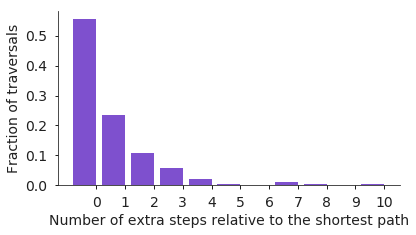

In [20]:
fig = plt.figure(figsize=(6, 3.5), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
ax.set_frame_on(True)

c = Counter()
for key, each in empirical.items():
    empirical_length = len(each["edges"])
    true_length = len(truth[key]["edges"])
    # print(key, empirical_length, true_length, empirical_length - true_length)
    c[empirical_length-true_length] += 1
    
print("Distribution of step distances: {0}".format(dict(c)))
x = dict(c)
ys = [y/float(len(empirical.items())) for y in x.values()]

ax.bar(x.keys(), ys, color='#7e50ce', edgecolor='None', clip_on=False, zorder=100, align='center')
ax.set_ylabel('Fraction of traversals', fontsize=LABEL_SIZE)
ax.set_xlabel('Number of extra steps relative to the shortest path', fontsize=LABEL_SIZE)

font = {'family' : 'sans', 'sans-serif': 'Helvetica', 'size': LABEL_SIZE}
matplotlib.rc('font', **font)

plt.tight_layout()

ax.set_xticks(np.arange(11))
#ax.set_xlim(0,10)

bar_width = 1
ax.xaxis.set_tick_params(width=bar_width)
ax.yaxis.set_tick_params(width=bar_width)

ax.set_xticks(np.arange(11) + 0.40*bar_width)
ax.set_xticklabels(np.arange(11))

finalize(ax)

plt.savefig('bar_distribution.tif', format="tif", dpi=1200)
plt.show()

In [21]:
print "Average excess: {0}".format(np.mean(list(c.elements())))

Average excess: 0.882926829268


In [22]:
print "Percentage optimal path: {0}\tPercentage within 1 hop: {1}".format(
    dict(c)[0]/float(len(empirical.items()))*100, 
    sum([value for key, value in dict(c).items() if key <= 1])/float(len(empirical.items()))*100)

Percentage optimal path: 55.6097560976	Percentage within 1 hop: 79.0243902439


In [23]:
number_of_hops = []
for key, each in empirical.items():
    number_of_hops.append(len(each["edges"]))

In [24]:
print "Average number of hops: {0}".format(np.average(number_of_hops))

Average number of hops: 1.96585365854
